# Natural language processing with TensorFlow

This is a tutorial provided in [TensorFlow](https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S) youtube channel.

# Brief summary

<blockquote>
Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.
</blockquote>

The first thing we must have in mind the differences of **human** and **machine language**... <br>

 While we are great at interpreting tone, facial and body expression, irony and a lot of nuances in speech and text... well, machines are not (or at least not in the same way as we do).<br>
  So the first step would be to convert data from human language to machine language. While there are many ways to do it, one that is quite simple and used in the tutorial from [TensorFlow](https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S) is Tokenization. <br>
  Briefly, Tokenization aims at chopping large contents of text into small chunks. Then we can assign numbers or "keys" for each Token, in every line of text that we are working on. This strategy creates something like a dictionary and we can use this dictionary to transform every sentence into a set of keys. <br>
  Then we end up with a structure that grealy resemble matrices... and as everybody knows, the computer works quite well with numbers. In fact, in Python we can use numpy or other packages to speed up the process.<br>
  After this fragmentation is done, we can then feed these matrices to our model and train it. In the case of this small project, we are working in a Supervised Manner, meaning that we tell the algoritghm which sentences are "Sarcastic" and which are "Non-Sarcastic". Then, our model does its magic, by learning the "weight" of tokens and how these tokens impact the label of each sentence...

#### But... do not take it from me. Here are some articles from people that actually know about it!

1. [Your Guid to Natural Language Processing](https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1);
2. [An Introduction to Natural Language Processing (NLP)](https://medium.com/@ODSC/an-introduction-to-natural-language-processing-nlp-8e476d9f5f59);
3. [Data Science por Brasileiros — Introdução a (NLP) - Article in Portuguese](https://medium.com/@adilmarcoelhodantas/data-science-pt-nlp-70c696b59f00);
4. [Natural Language Processing (NLP) Zero to Hero](https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S).


# After some reading...
Lets work it out!

## Importing Stuff

In [1]:
import json # Necessary for importing our dataset later
import tensorflow as tf 

# Necessary modules for fragmenting and processing our data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Parameter for configuring our model

In [2]:
vocab_size = 10000 # Max vocabulary size. Not all words are necessary to train our model.
embedding_dim = 16 # Number of dimensions of our model
max_length = 100 # Max number of tokens in a sentence. Not all words in a sentence are necessary!
trunc_type='post' 
padding_type='post' 
oov_tok = "<OOV>" # If our model finds anything unknown...
training_size = 20000 # Number of sentences that we will use for training our model.

### Dataset to train our model

Our [Dataset](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) consists of around **~26 thousand** headlines classified in "Sarcastic (1)" or "Non-Sarcastic (0)"

![text](dataset.png) 

Downloading the data

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-11-02 17:19:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4001:809::2010, 2800:3f0:4001:81b::2010, 2800:3f0:4001:819::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4001:809::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5,4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5,38M  11,1MB/s    in 0,5s    

2020-11-02 17:19:50 (11,1 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



Writing headlines to `sentences` and labels to `labels` lists

In [4]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

Splitting our data

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
print(f"The total number of senteces in our dataset is {len(sentences)}")
print(f"The ammount used to train our model was {training_size}")
print(f"Thus, we have {round((training_size/len(sentences) * 100), 2)}% for training and {round((100 - 74.88), 2)}% for evaluating")

The total number of senteces in our dataset is 26709
The ammount used to train our model was 20000
Thus, we have 74.88% for training and 25.12% for evaluating


### Tokenization and padding

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Transforming the data into arrays

In [7]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Writing our model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


### Running it!

In [10]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6707 - accuracy: 0.5745 - val_loss: 0.6064 - val_accuracy: 0.6971
Epoch 2/30
625/625 - 2s - loss: 0.4630 - accuracy: 0.8206 - val_loss: 0.4023 - val_accuracy: 0.8347
Epoch 3/30
625/625 - 2s - loss: 0.3295 - accuracy: 0.8725 - val_loss: 0.3606 - val_accuracy: 0.8489
Epoch 4/30
625/625 - 2s - loss: 0.2764 - accuracy: 0.8925 - val_loss: 0.3465 - val_accuracy: 0.8548
Epoch 5/30
625/625 - 2s - loss: 0.2404 - accuracy: 0.9083 - val_loss: 0.3464 - val_accuracy: 0.8511
Epoch 6/30
625/625 - 2s - loss: 0.2108 - accuracy: 0.9202 - val_loss: 0.3463 - val_accuracy: 0.8526
Epoch 7/30
625/625 - 2s - loss: 0.1884 - accuracy: 0.9311 - val_loss: 0.3575 - val_accuracy: 0.8542
Epoch 8/30
625/625 - 2s - loss: 0.1690 - accuracy: 0.9373 - val_loss: 0.3657 - val_accuracy: 0.8514
Epoch 9/30
625/625 - 2s - loss: 0.1532 - accuracy: 0.9438 - val_loss: 0.3922 - val_accuracy: 0.8444
Epoch 10/30
625/625 - 2s - loss: 0.1394 - accuracy: 0.9508 - val_loss: 0.3939 - val_accuracy: 0.8523

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')



def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs", fontsize=16)
    plt.ylabel(string, fontsize=16)
    plt.legend([string, 'val_'+string], fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

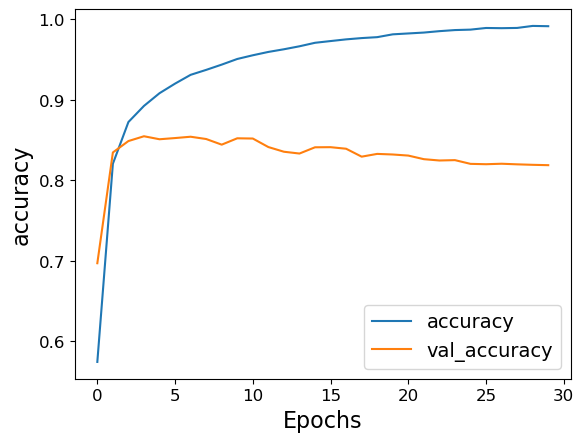

In [12]:
plot_graphs(history, "accuracy")

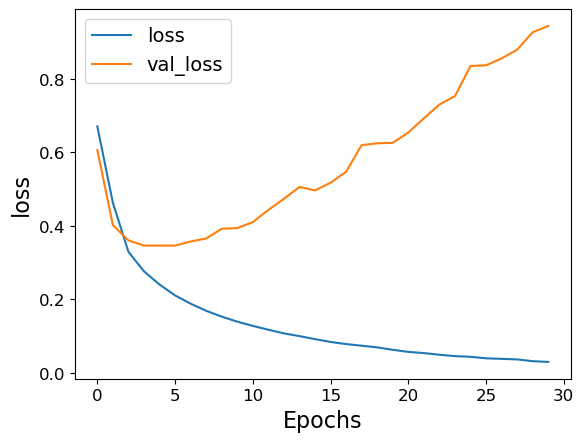

In [13]:
plot_graphs(history, "loss")

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


Writing the data to files

In [16]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

## Now that our model is smart (!?)... Lets test it!

In [17]:
def predictor(text):
    token = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(token, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    print(model.predict(padded))

The two first sentences are news headlines extracted from the CNN website. <br>
The third one is actually one that I made up

In [18]:
text = ['Determined voters endure long lines to cast early ballots in historic election', 
        'Covid-19 makes it harder to save dogs and cats across borders, but rescue organizations are finding a way',
        'Old lady, tired of walking, decides to fly instead']

predictor(text)

[[2.6951774e-03]
 [7.0647849e-10]
 [9.9815375e-01]]


As we have discussed earlier, Sarcastic was classified as 1 and Non-Sarcastic as 0.<br>
In this sense, our model shows us:
1. That the first phrase is most likely Non-Sarcastic;
2. The second one is actually "really" Non-Sarcastic (4.63e-8);
3. The third one seems so much Sarcastic! (9.99e-01)